In [1]:
import pandas as pd
import numpy as np
import shap

import mlflow
import mlflow.sklearn

from xgboost import plot_importance
import matplotlib.pyplot as plt

shap.initjs()

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path)
    X = data.drop('Class', axis=1)
    y = data['Class']

    return X, y

X, y = load_data('../data/creditcard.csv')

In [3]:
model_name = 'fraud_detection'
model_version = '1'
tracking_url = 'place-url-here'

mlflow.set_tracking_uri(tracking_url)
model_uri = f'models:/{model_name}/{model_version}'

pipeline = mlflow.sklearn.load_model(model_uri)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                ('estimator',
                 XGBClassifier(base_score=None, booster=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [4]:
preprocessor = pipeline['preprocessor']
model = pipeline['estimator']
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

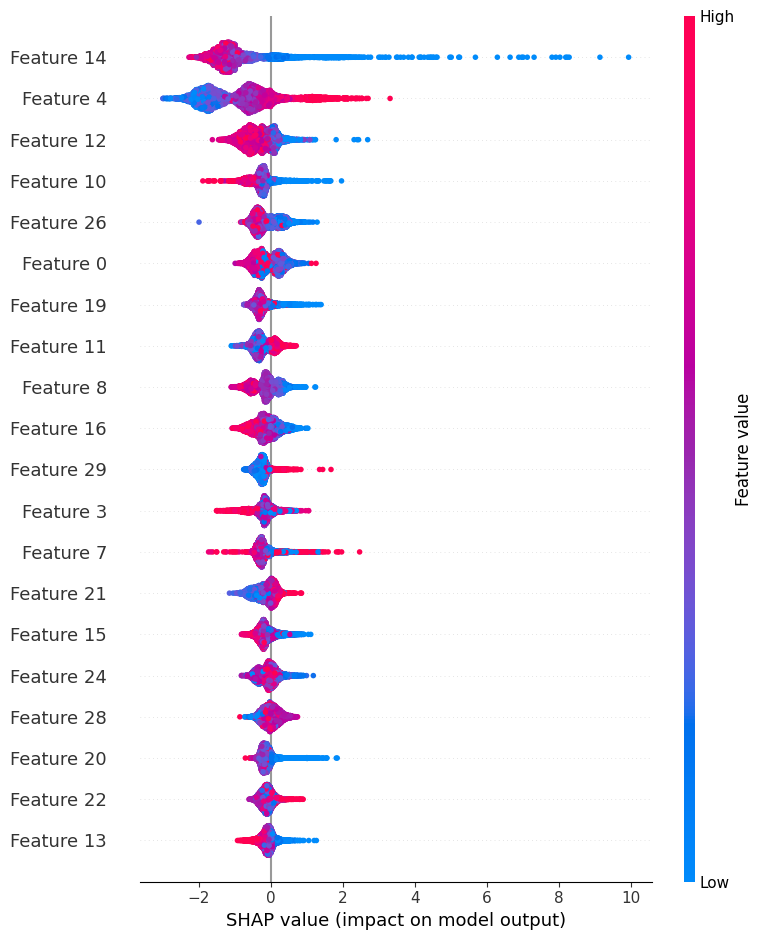

In [5]:
Xd = preprocessor.fit_transform(X.sample(10000))
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
shap.summary_plot(shap_values, Xd)

- Feature 14 has an inverse relationship with the prediction: low values increase the prediction, and high values decrease it.
- Feature 4 has a positive relationship: high values increase the prediction, and low values decrease it.
- Features lower down the list (like Feature 12) have less impact on the predictions due to their narrower range of SHAP values.